In [ ]:
# Predictive Modeling - ANN Model

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# -------------------------------
# 1. Load Dataset
# -------------------------------      
data = pd.read_csv("preprocessed_data.csv")
data.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,Churn
0,Female,0,No,1,No,No,DSL,Month-to-month,25,Yes
1,Male,0,No,41,Yes,No,DSL,One year,25,No
2,Female,0,Yes,52,Yes,No,DSL,Month-to-month,19,No
3,Female,0,No,1,Yes,No,DSL,One year,76,Yes
4,Male,0,No,67,Yes,No,Fiber optic,Month-to-month,51,No


In [ ]:
# 2. Check for Missing Values
print("\nChecking for Missing Values:\n")
print(data.isnull().sum())


Checking for Missing Values:

gender             0
SeniorCitizen      0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
Contract           0
MonthlyCharges     0
Churn              0
dtype: int64


In [ ]:
# 3. Basic Data Info

print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           7043 non-null   object
 1   SeniorCitizen    7043 non-null   int64 
 2   Dependents       7043 non-null   object
 3   tenure           7043 non-null   int64 
 4   PhoneService     7043 non-null   object
 5   MultipleLines    7043 non-null   object
 6   InternetService  7043 non-null   object
 7   Contract         7043 non-null   object
 8   MonthlyCharges   7043 non-null   int64 
 9   Churn            7043 non-null   object
dtypes: int64(3), object(7)
memory usage: 550.4+ KB
None


/tmp/ipython-input-3916701235.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='Set2')


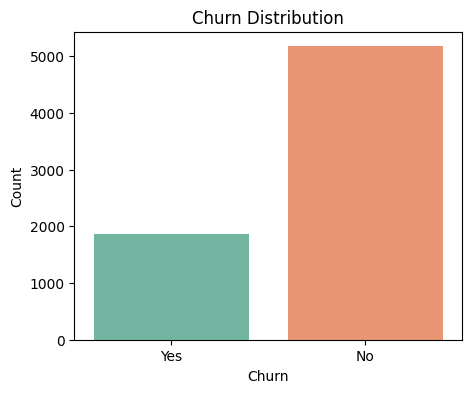

In [ ]:
# 4. Exploratory Data Analysis (EDA)

# Target variable distribution
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-3539866050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='gender', palette='pastel')


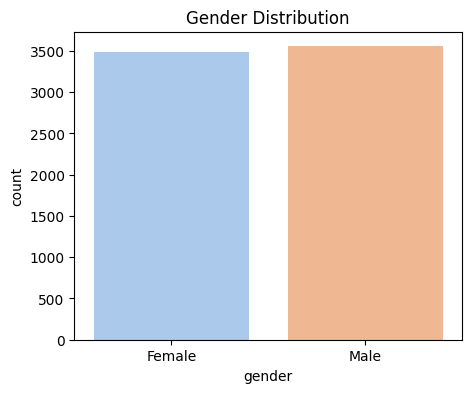

In [ ]:
# Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(data=data, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()

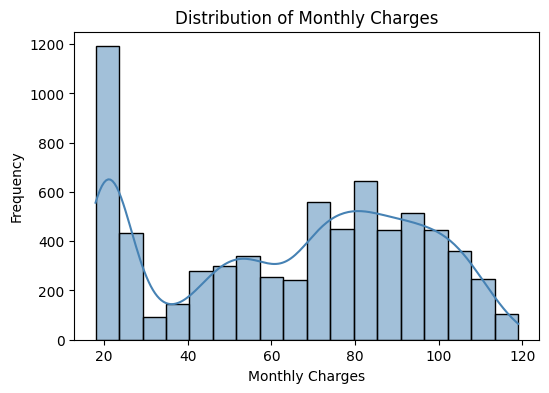

In [ ]:
# Distribution of Monthly Charges
plt.figure(figsize=(6,4))
sns.histplot(data['MonthlyCharges'], kde=True, color='steelblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

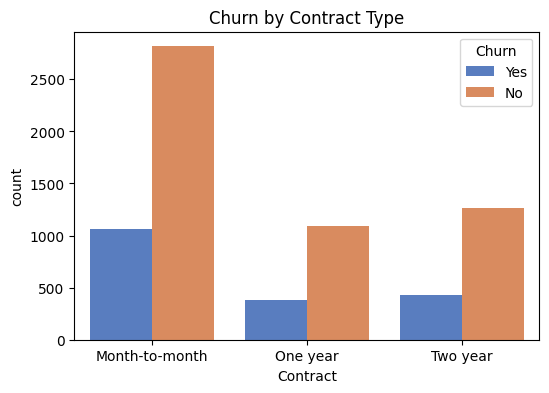

In [ ]:
# Churn by Contract Type
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Contract', hue='Churn', palette='muted')
plt.title('Churn by Contract Type')
plt.show()